In [8]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
# read the pickle file
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [10]:
ball_pos = [x.get(1, []) for x in ball_positions]
# convert list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_pos, columns=["x1", "y1", "x2", "y2"])

# interpolate missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [12]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2']) / 2    

In [14]:
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

In [15]:
df_ball_positions

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean
0,894.776917,615.943665,912.112427,633.955017,624.949341,624.949341
1,894.776917,615.943665,912.112427,633.955017,624.949341,624.949341
2,877.182312,631.530731,896.049774,651.819183,641.674957,630.524546
3,859.587708,647.117798,879.987122,669.683350,658.400574,637.493553
4,846.781372,660.448303,865.922607,681.461731,670.955017,644.185846
...,...,...,...,...,...,...
209,1187.214396,243.017501,1198.838460,254.795742,248.906621,267.525360
210,1184.333008,233.756439,1195.903564,245.438065,239.597252,258.215991
211,1183.688599,227.374741,1196.187744,241.296158,234.335449,249.716135
212,1180.953491,213.900055,1195.046021,228.308624,221.104340,240.431931


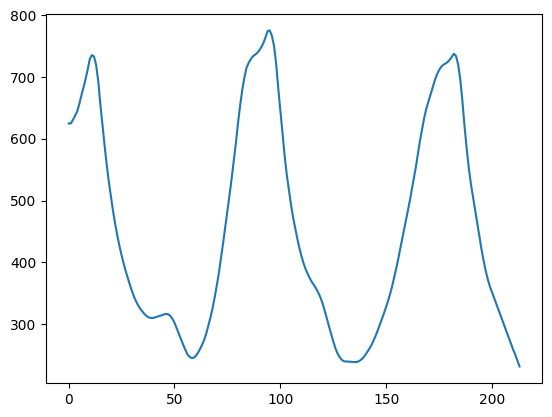

In [18]:
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [19]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

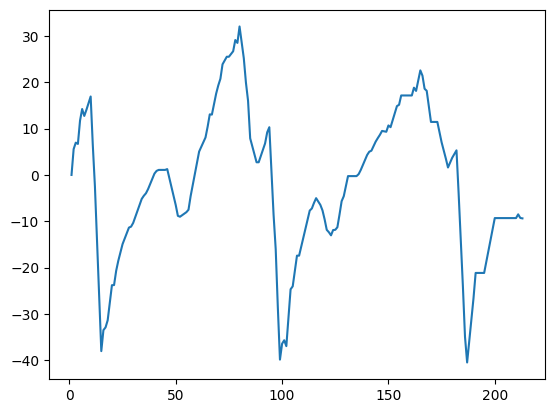

In [20]:
plt.plot(df_ball_positions['delta_y'])

In [21]:
df_ball_positions['ball_hit'] = 0

In [ ]:
min_change_frames_for_hit = 25
for i in range(1, len(df_ball_positions)-int(min_change_frames_for_hit*1.2)):
    negative_pos_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i+1] < 0
    positive_pos_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i+1] > 0

    if negative_pos_change or positive_pos_change:
        change_cost = 0
        for change_frame in range(i+1, i+int(min_change_frames_for_hit*1.2)+1):
            negative_pos_change_following_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[change_frame] < 0
            positive_pos_change_following_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[change_frame] > 0

            if negative_pos_change and negative_pos_change_following_frame:
                change_cost += 1
            elif positive_pos_change and positive_pos_change_following_frame:
                change_cost += 1
        
        if change_cost > min_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1
    
frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit'] == 1].index.tolist()
    


C:\Users\Natanya Modi\AppData\Local\Temp\ipykernel_25460\3143286744.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\Natanya Modi\AppData\Local\Temp\ipykernel_25460\3143286744.py:21: Set

In [23]:
df_ball_positions[df_ball_positions['ball_hit'] == 1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,778.320374,718.745422,796.360657,738.234985,728.490204,735.784851,6.485260,1
58,926.669006,242.302756,938.081055,253.124481,247.713618,244.838135,-2.170508,1
95,623.843811,748.683411,641.972260,767.738281,758.210846,775.624896,0.855927,1
135,752.211426,233.335327,760.869751,242.059662,237.697495,238.203556,-0.253031,1
182,1294.508545,740.690613,1313.989868,760.679138,750.684875,738.027161,5.303021,1


In [24]:
frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit'] == 1].index.tolist()